In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

In [15]:
df = pd.read_json("../data/processed/mturk_data.json")

In [16]:
# Unpack json data
from pandas.io.json import json_normalize #package for flattening json in pandas df
import json
#load json object
with open("../data/processed/dataset_analytics/mturk_data.json") as f:
    data = json.load(f)

#lets put the data into a pandas df
#clicking on raw_nyc_phil.json under "Input Files"
#tells us parent node is 'programs'
df = json_normalize(data, 'result', ["label","label_image_count", "total_image_overlap"],
                    record_prefix='compare_', errors='ignore')



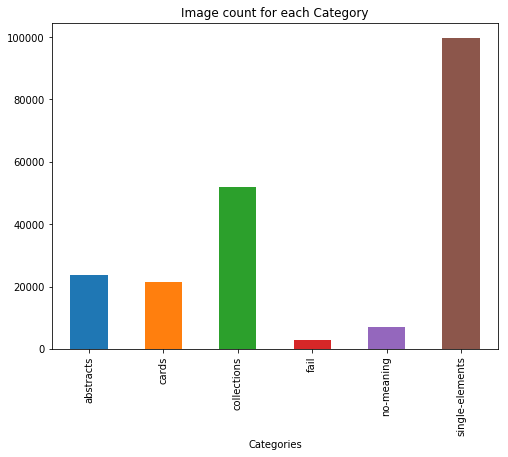

In [17]:
labels_image_count = df.groupby("label")["label_image_count"].max()
ax = labels_image_count.plot("bar", title="Image count for each Category", figsize=(8, 6))
ax.set_xlabel('Categories')
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
compare_image_count        30 non-null int64
compare_label              30 non-null object
compare_overlap            30 non-null int64
compare_overlap_percent    30 non-null float64
label                      30 non-null object
label_image_count          30 non-null int64
total_image_overlap        30 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.7+ KB


In [19]:
labels_with_overlap = df.groupby("label")["total_image_overlap", "label_image_count"].max()

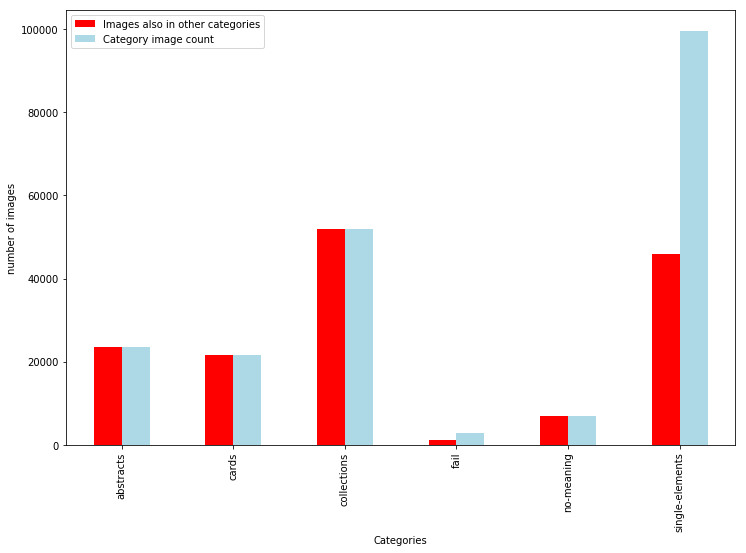

In [20]:
ax = labels_with_overlap.plot(kind="bar", figsize=(12, 8),color=['red', 'lightblue'])
ax.set_ylabel('number of images')
ax.set_xlabel('Categories')
ax.legend(["Images also in other categories","Category image count"])

plt.show()

In [27]:
unique_df = df.loc[df['label'] == "collections"]

In [28]:
unique_df

,compare_image_count,compare_label,compare_overlap,compare_overlap_percent,label,label_image_count,total_image_overlap
15,21546,cards,21546,41.409133,collections,52032,52032
16,6908,no-meaning,6908,13.276445,collections,52032,52032
17,2831,fail,388,0.745695,collections,52032,52032
18,99630,single-elements,45124,86.723555,collections,52032,52032
19,23578,abstracts,23578,45.314422,collections,52032,52032


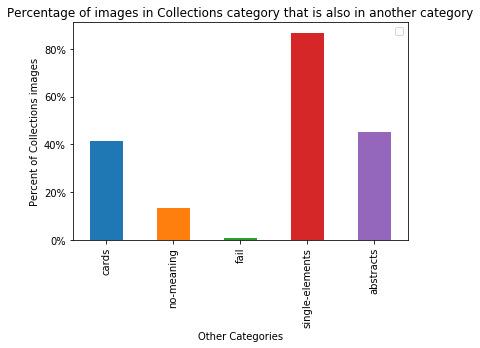

In [36]:
    ax = unique_df.plot(x="compare_label", y="compare_overlap_percent", kind="bar", title="Percentage of images in Collections category that is also in another category")
    ax.yaxis.set_major_formatter(ticker.PercentFormatter())
    ax.legend("")
    ax.set_ylabel('Percent of Collections images')
    ax.set_xlabel('Other Categories')
    plt.show()